# HOMEWORK SET 1 (Python bootcamp)

## Problem 1: Summations using loops

In the box below, write a for loop that evaluates the sum
$$ S = \sum_{k = k_{min}}^{k_{max}} k^m $$
for arbitrary values of $i_{min}$ < = $i_{max}$, and $m$.

In [80]:
k_min = 1
k_max = 2
m     = 2

S = 0.0
for k in range(k_min,k_max+1):

    S += k**m

print("The value of the sum is",S)

The value of the sum is 5.0


## Problem 2: Overlap integrals

In the box below, write a function that uses standard library functions to return the value of the overlap integral $S_{m,n}$ between two particle in a box eigenfunctions $\psi_n(x)$ and $\psi_m(x)$ <br> 
$$S_{m,n} = \int_{0}^{L} \left[\psi_m(x)\right]^* \psi_n(x)$$ , 
where $L$ is the width of the box, and the normalized particle in a box eigenfunctions are defined as
$$ \psi_n(x) = \sqrt{\frac{2}{L}}{\rm sin} \left( \frac{n\pi x}{L}\right) \hspace{1cm} n = 1,2,...\infty$$

To check the accuracy of your function, note that the particle in a 1-D box eigenfunctions are orthonormal and hence
$$ S_{mn} = \left\{ \begin{array}{cc}1 & m = n \\ 0 & m \neq n \end{array} \right\} $$
for any $L > 0.0$.

In [81]:
import numpy as np
import scipy.integrate as spint

def sine_product(x,n,m,L):

    return np.sin( n * np.pi * x / L ) * np.sin( m * np.pi * x / L )

def S_mn(m,n,L):

    I = spint.quad(sine_product,0.0, L, args=(n,m,L))

    return ( 2.0 / L ) *  I[0]

print(S_mn(1,2,1.0))


1.3305936929692148e-17


## Problem 3: Fourier expansion of the Dirac delta function $\delta (x)$

The Fourier expansion of the Dirac delta function $\delta(x)$ is given by
$$ \delta(x) = \frac{1}{\pi} \left( \frac{1}{2} + \sum_{k=1}^{k_{max}} {\rm cos} (k x) \right) $$
In the box below, do the following.

1. Write a function that returns the value of $\delta(x)$ for some value of $x$ and $k_{max}$. To check the accuracy of your function
| $k_{max}$ | $x$   | $\delta(x)$ |
|:---------:|:-----:|:-----------:|
| 10 | 0.0 | 3.3422538049298023 |
| 10 | 1.2345 | 0.16944841348224607 | 
| 100 | 0.0 | 31.990143561470965 |
| 100 | 1.2345 | -0.20241043182087362 |

2. Use your function to calculate the integral

   $$ \int_{-\pi}^{\pi} \delta(x)dx$$

   When done correctly, the value of the integrals is $1.0$ (within machine precision).

4. Plot $\delta(x)$ on the interval $- \pi \leq x \leq \pi$ for $k_{max} = 10$ and $k_{max} = 1000$.  

The integral is: 2.886579864025407e-15


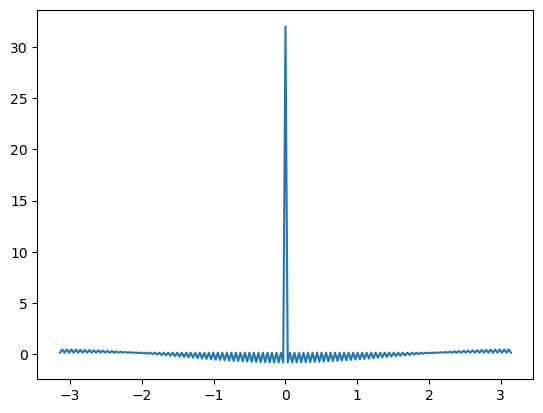

In [82]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt

def delta_x(x,N):

    fun_val = 1.0/2.0
    
    for i in range(1,N+1):
 
        fun_val += np.cos( (i+1) * x )

    
    return fun_val / np.pi

N_plot = 201
N_exp  = 100
L      = np.pi
dx     = 2.0 * L / ( N_plot - 1 )

x_plot = np.zeros( N_plot, dtype = float )
dirac  = np.zeros( N_plot, dtype = float )


I = spint.quad(delta_x,-np.pi,np.pi,args=(N_exp),limit=2000)

print("The integral is:",1.0-I[0])

for i in range(N_plot):

    x_plot[i]     = -L + dx * float(i)
    dirac[i] = delta_x(x_plot[i],N_exp)

plt.plot(x_plot,dirac)


## Problem 4: Solving transcendental equations

Assuming that $\bar{C}_P \neq \bar{C}_P(T)$, the temperature dependence of $\Delta_RG(T)$ is given by the expression

$$ \Delta_R G^0(T) = \Delta_R H^0(T_0) + \Delta_RC_P \left( T - T_0 \right) - T \left[ \Delta_R S^0(T_0) + \Delta_R C_P(T_0) \cdot {\rm ln} \left( \frac{T}{T_0} \right) \right]$$

In the box below, write code that determines the temperature $T^*$ at which $\Delta_RG^0(T^*) = 0$.